In [24]:
import numpy as np
from enum import Enum
from copy import copy, deepcopy
from collections import deque

import matplotlib.pyplot as plt 
%matplotlib notebook

In [2]:
CALORIES_STEP_SIZE=250

class Goal(Enum):
    LOSS = -CALORIES_STEP_SIZE
    MAINTAIN = 0
    GAIN = CALORIES_STEP_SIZE

In [3]:
class UnhandledCaseException(Exception):
    pass

In [4]:
objective = Goal.LOSS

In [5]:
objective.name

'LOSS'

In [6]:
objective.value

-250

In [47]:
aca = 2000

In [48]:
dej = 1900

In [49]:
mb = 1400

In [50]:
assert dej > mb 

In [51]:
def is_close(a, b, close=150):
    if abs(a - b) < close:
        return True
    return False

In [52]:
def init():

    if objective.name == 'LOSS':

        if aca > dej:
            print("Generate a menu equal to (or less than) ACA")
        elif is_close(aca, dej):
                print("Generate a menu equal to (or less than) ACA")
        elif aca < dej:
                print("Generate a menu equal to (or less than) ACA")
        else: 
            raise UnhandledCaseException()


    if objective.name == 'MAINTAIN':
        raise UnhandledCaseException()


    if objective.name == 'GAIN':
        if aca > dej:
            print("Generate a menu equal to (or less than) ACA")
        elif is_close(aca, dej):
                print("Generate a menu equal to (or less than) ACA")
        elif aca < dej:
                print("Generate a menu equal to (or less than) ACA")
        else: 
            raise UnhandledCaseException()

In [105]:
class State:
    pass

class Sequence:
    def __init__(self):
        self.state = {
            "goal": objective,
            "age_in_weeks": 0,
            "phase": Phase.LOSS,
            "dej": dej,
            "mb": mb,
            "aca": aca,
            "weight": 80,
            "weeks_in_phase": 0,
        }
        self.history = deque(maxlen=10)
        
    def get_weight_last_n_weeks(self, n=3):
        if len(self.history) >= n:
            return [x["weight"] for x in self.history][-n:]

In [106]:
s = Sequence()
s.state

{'goal': <Goal.LOSS: -250>,
 'age_in_weeks': 0,
 'phase': <Phase.LOSS: 0>,
 'dej': 1900,
 'mb': 1400,
 'aca': 2000,
 'weight': 80,
 'weeks_in_phase': 0}

In [107]:
s.get_weight_last_n_weeks()

In [114]:
for i in range(12):
    if s.state["age_in_weeks"] == 0:
        init()
        s.state["age_in_weeks"] += 1
    else: 
        print(s.state)
        _state = deepcopy(s.state)
        
        ## update state
        h = s.get_weight_last_n_weeks()
        if len(h) >= 3:
            delta = h[-1] - h[0]
            if delta >= 0: # prise de poids ou stagnation
                s.state["aca"] -= 250 # todo check if aca > mb, should not go below mb
        ## end update state
        
        s.history.append(_state)
        s.state["age_in_weeks"] += 1
        s.state["weeks_in_phase"] += 1
    

{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 12, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 2000, 'weight': 80, 'weeks_in_phase': 11}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 13, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 1750, 'weight': 80, 'weeks_in_phase': 12}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 14, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 1500, 'weight': 80, 'weeks_in_phase': 13}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 15, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 1250, 'weight': 80, 'weeks_in_phase': 14}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 16, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 1000, 'weight': 80, 'weeks_in_phase': 15}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 17, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 750, 'weight': 80, 'weeks_in_phase': 16}
{'goal': <Goal.LOSS: -250>, 'age_in_weeks': 18, 'phase': <Phase.LOSS: 0>, 'dej': 1900, 'mb': 1400, 'aca': 500, 'w

In [111]:
h = s.get_weight_last_n_weeks()
delta = h[-1] - h[0]
delta

0

# Separer l'objectif de la phase

In [14]:
class Phase(Enum):
    LOSS = 0
    STOP = 1
    MAINTAINANCE = 2 
    

In [15]:
# Cycler p127

In [16]:
if objective.name == 'LOSS':
    print("PERTE")
    print("ARRET")
    print("ENTRETIEN")
    print("PERTE")
    
if objective.name == 'GAIN':
    print("GAIN")
    print("ARRET")
    print("ENTRETIEN")
    print("GAIN")

PERTE
ARRET
ENTRETIEN
PERTE


# Simulation 

In [44]:
initial_weight = 80
dej_hat = 2000

delta_w = np.random.normal(size=100)

weights = np.cumsum(delta_w)

<IPython.core.display.Javascript object>


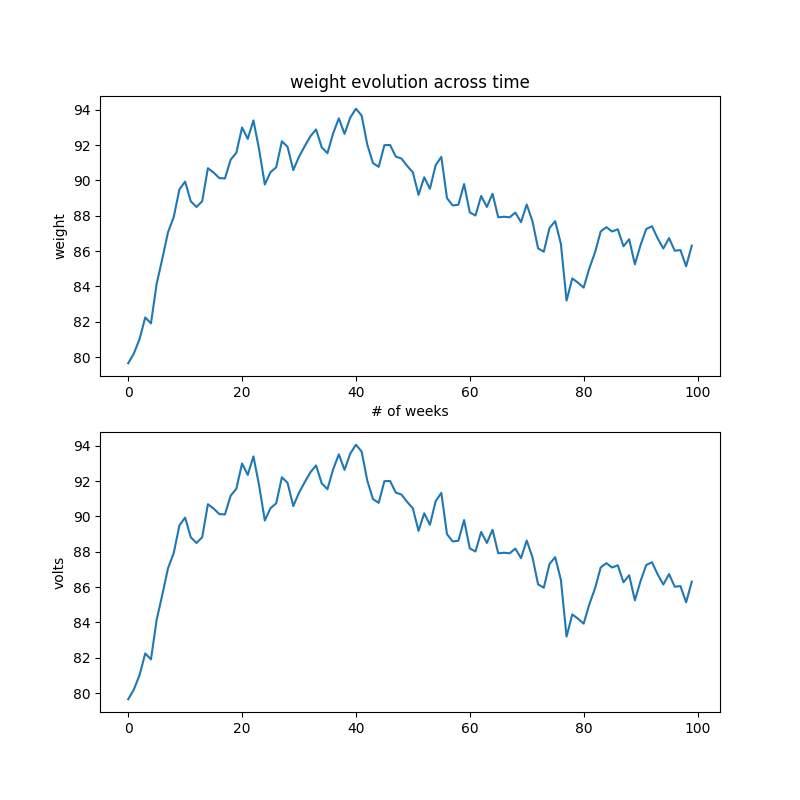

In [62]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(211)
ax1.set_ylabel('weight')
ax1.set_xlabel('# of weeks')
ax1.set_title('weight evolution across time')
ax1.plot(weights + initial_weight)


ax2 = fig.add_subplot(212)
ax2.set_ylabel('volts')
ax2.plot(weights + initial_weight)

plt.show()